# Logistic Regression on Heart Disease Dataset

In [2]:
## importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis

In [3]:
##reading our dataset

train = pd.read_csv('heart.csv')

In [4]:
##checking the first five rows of the dataset
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
train.shape ## to check the number of rows and columns in the dataset

(303, 14)

In [6]:
train.isnull().sum()  ##to the number of nulll values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# reading the ean, median, mode, quantiles and standard deviation 
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
train.info() # to check the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
train.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [12]:
train.nunique() ## displaying the unique values in each feature

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

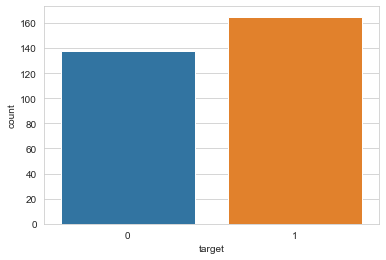

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='target', data= train)

<AxesSubplot:xlabel='target', ylabel='count'>

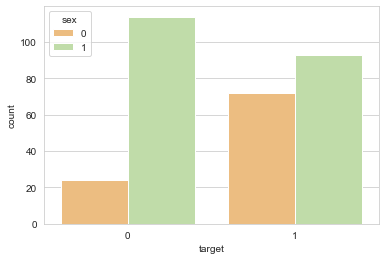

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue = 'sex', data= train, palette = 'Spectral')

<AxesSubplot:xlabel='target', ylabel='count'>

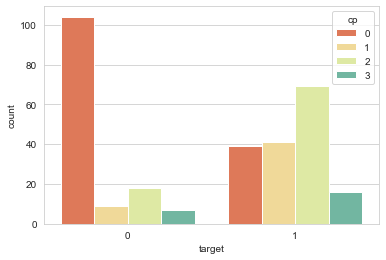

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue = 'cp', data= train, palette = 'Spectral')

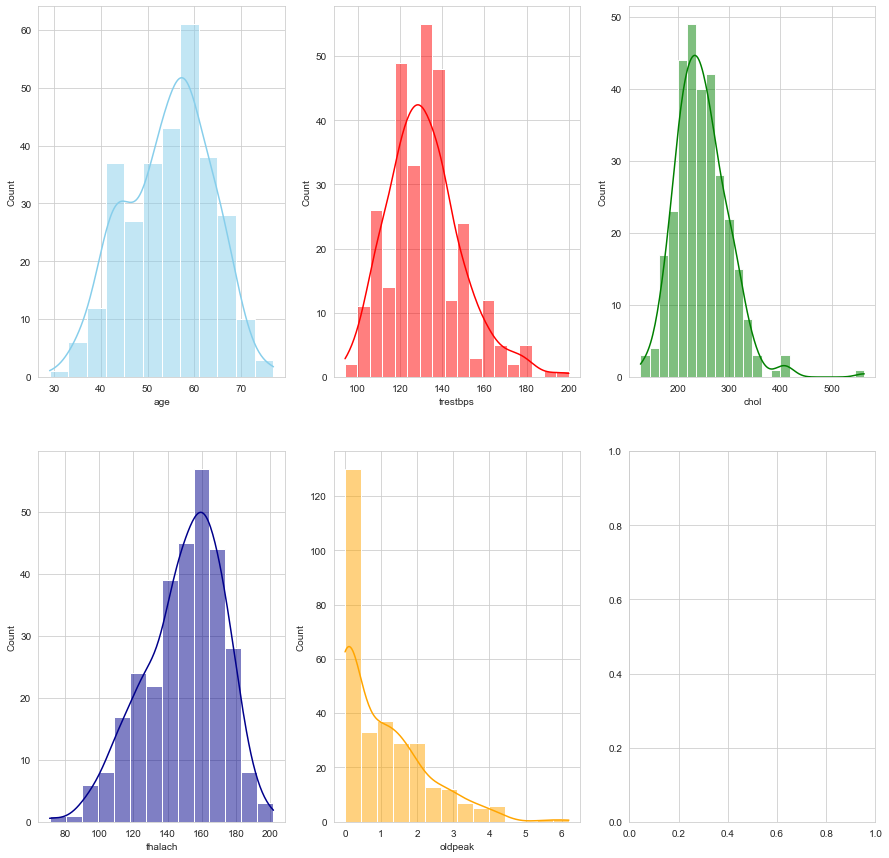

In [16]:
##checking the distribution of all the features of the dataset

fig, axs = plt.subplots(2, 3, figsize=(15, 15))

sns.histplot(data=train, x="age", color="skyblue", label="age", kde=True, ax=axs[0, 0])
sns.histplot(data=train, x="trestbps", color="red", label="trestbps", kde=True, ax=axs[0, 1])
sns.histplot(data=train, x="chol", color="green", label="chol", kde=True, ax=axs[0, 2])
sns.histplot(data=train, x="thalach", color="darkblue", label="thalach", kde=True, ax=axs[1, 0])
sns.histplot(data=train, x="oldpeak", color="orange", label="oldpeak", kde=True, ax=axs[1, 1])
plt.show()

In [17]:
train['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [18]:
## my independent features

X= train.iloc[:,:-1]
X.shape

(303, 13)

In [19]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
# my dependent feature

y = train['target']

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
## feature scaling(Standardization)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X)

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [26]:
## spliting the data into training set and test set using train_test_split

from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((212, 13), (212,), (91, 13), (91,))

In [31]:
##Aplying logistic regression

from sklearn.linear_model import LogisticRegression

In [49]:
##using confusion_matrix to check accuracy of the model
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\user\anaconda3\envs\akash1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_train_pred = logmodel.predict(X_train)
y_test_pred = logmodel.predict(X_test)
print(logmodel.score(X_train,y_train))
print(logmodel.score(X_test,y_test))
print(classification_report(y_test,y_test_pred))

0.8632075471698113
0.8351648351648352
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



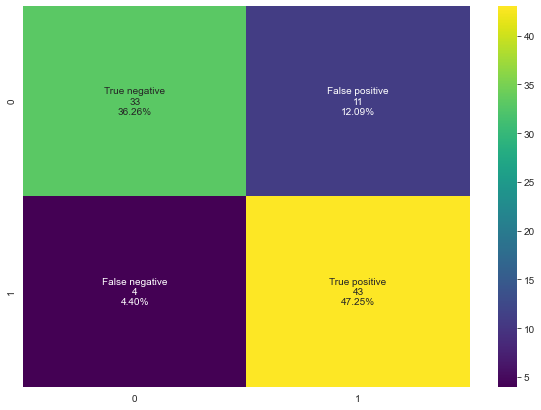

In [47]:
cm = confusion_matrix(y_test, y_test_pred)

group_names = ['True negative','False positive','False negative','True positive']

labels = np.asarray(labels).reshape(2,2)  ##using asarray to convert into an array
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=labels, fmt='', cmap='viridis')
plt.show()